In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Dataset

In this homework, we will use the New York City Airbnb Open Data.

**Goal** of this homework is to create a regression model for prediction apartment prices (column 'price').

## EDA

In [2]:
# Load the data
df = pd.read_csv('./Data/AB_NYC_2019.csv')

In [3]:
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


In [4]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

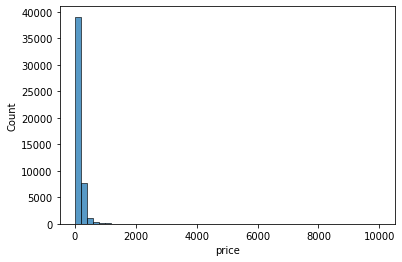

In [5]:
# Look at the price variable. Does it have a long tail?
sns.histplot(df.price, bins=50)

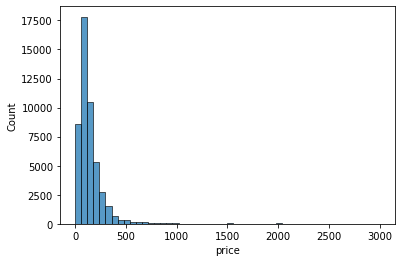

In [6]:
# Zoom out the price
sns.histplot(df[df.price < 3000]['price'], bins=50)

The price variable has a long tail 

## Features

In [7]:
# For the rest of the homework, you'll need to use only these columns:
cols = [
    
    'latitude', 'longitude', 'price',
    'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365'
]

## Question 1

In [8]:
# Find a feature with missing values. How many missing values does it have?
data = df[cols].copy()

In [9]:
data.isnull().sum()

latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

The 'reviews_per_month' feature has 10052 missing values.

## Question 2

In [10]:
# What's the median (50% percentile) for variable 'minimum_nights'?
data.minimum_nights.describe()

count    48895.000000
mean         7.029962
std         20.510550
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

In [11]:
data.minimum_nights.median()

3.0

The median is 3.0

## Split the data

In [12]:
price = data.price.values
# Apply the log transformation to the price variable using the np.log1p() function
price_log = np.log1p(price)

Text(0.5, 0, 'Price')

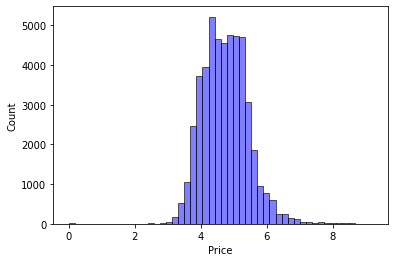

In [13]:
# sns.histplot(price, color='red', alpha=0.5, bins=50)
sns.histplot(price_log, color='blue', alpha=0.5, bins=50)
plt.xlabel('Price')

In [14]:
np.random.seed(42)

In [15]:
data = data.reset_index(drop=True)

In [16]:
# np.log1p() to the price
data['price'] = price_log 

In [17]:
data.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,5.010635,1,9,0.21,6,365
1,40.75362,-73.98377,5.420535,1,45,0.38,2,355
2,40.80902,-73.94190,5.017280,3,0,NaN,1,365
3,40.68514,-73.95976,4.499810,1,270,4.64,1,194
4,40.79851,-73.94399,4.394449,10,9,0.10,1,0


In [18]:
# number of sample
n = data.shape[0]
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [19]:
indx = np.arange(n)

In [20]:
np.random.shuffle(indx)

In [21]:
# Split your data in train/val/test sets, with 60%/20%/20% distribution.
X_train = data.loc[indx[:n_train]]
X_val = data.loc[indx[n_train:n_train+n_val]]
X_test = data.loc[indx[n_train + n_val:]]

In [22]:
X_train.shape, X_val.shape, X_test.shape

((29337, 8), (9779, 8), (9779, 8))

In [23]:
data.shape[0] == (X_train.shape[0] + X_val.shape[0] + X_test.shape[0])

True

In [24]:
y_train = X_train.price.values
y_val = X_val.price.values
y_test = X_test.price.values

In [25]:
# Make sure that the target value ('price') is not in your dataframe
del X_train['price']
del X_val['price']
del X_test['price']

## Question 3